# Homework 4: Fitting data using SciPy

### <p style="text-align: right;"> &#9989; Kaitlyn Watson </p>

# __CMSE  201 &ndash; Spring 2022__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />
     
## Goals

### By the end of the homework assignment you will have practiced:

1. Fitting curves using SciPy
2. Plotting data and the correspoding best-fit results
3. Calculating mean squared error when fitting a models to data

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, March 18.** 

It should be uploaded to D2L in the approach "Homework" submission folder.  Submission instructions can be found at the end of the notebook as well.

## Grading

- Academic Integrity (1 point)
- Question 0 (1 point)
- Question 1 (4 points)
- Question 2 (3 points)
- Question 3 (19 points)
- Question 4 (5 points)
- Question 5 (9 points)
- Question 6 (6 points)
- Question 7 (2 points)

**Total:** 50 points


---
# Academic integrity statement (1 point)

In the markdown cell below, put your personal academic integrity statement (composed during the Day04 In-Class Assignment). By including this statement, you are confirming that the work you submit in the assignment is wholly your own.  

<font size=6 color="#009600">&#9998;</font> I, Kaitlyn Watson, commit to furthering my education at Michigan State University with full integrity. It is important to me to practice academic honesty in my coursework in order to fully benefit from the learning material and reflect good work ethic to those around me. I am motivated by my future career goals to conduct myself with integrity in everything that I do. Furthermore, I am fully aware of the ethical standards that MSU has established in regards to integrity and I intend to follow them to the best of my ability.

___


### &#9989;&nbsp; Question 0: Importing modules (1 point)

In this homework you're going to be using matplotlib, NumPy, and SciPy's `curve_fit` function, make sure you include all of the important and necessary `import` comments here.

In [1]:
# Put your code here
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## 1. Generating Model Data

### &#9989;&nbsp; Question 1.1: (2 points)

In this homework, we will look at fitting higher order polynomials to data, and compare them to the linear fitting. We start with the simplest linear function $y(x) = 2x$ on the domain $0 \leq x \leq 1$.

We start by making an array of $x-values$ that spans from 0 to 1 with 21 points between the two values. Then, we define the linear function $y(x) = 2x$. We call the corresponding $y$-data generated from the function $y$ the *pure data.*

We will also generate a noisy data set $z$ by adding Gaussian noise with mean zero and standard deviation 0.1 to all of the $y$ values.

You are the given some of the codes.
```
x = ?
y = ?
np.random.seed(seed = 1)
noise = np.random.normal(0, 0.1, x.size)
z = y + noise
```
In the following cell, please **complete** the missing parts that marked as (?) in the given codes.

Notice: Here the code `np.random.seed(seed = 1)` fixes the seed that generats subsequent random numbers, so that the following `np.random.normal` picks one specific random sequence. **In this homework, for the sake of grading, you should always add this command each time right before generating random numbers like `noise`.**

In [2]:
# Put your code here
x= np.linspace(0,1,21)
y = 2*x

np.random.seed(seed = 1)

noise = np.random.normal(0, 0.1, x.size)
z = y + noise

### &#9989;&nbsp; Question 1.2: (2 points)

Create a **plot** of these two data sets ($y$ and $z$) by making two sub-plots with separated markers. Remember to add proper axes labels and titles.

Text(0.5, 1.0, 'Noisy Data')

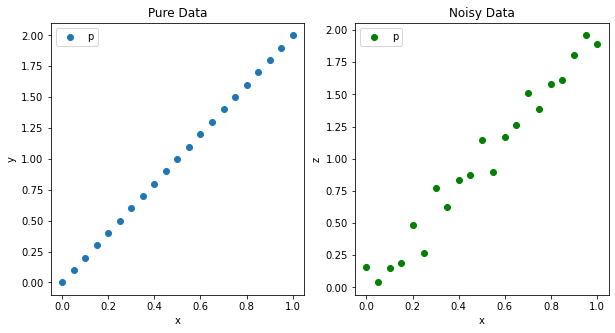

In [3]:
plt.subplots(2,1,figsize=(10,5))   #changing the dimensions of my subplots

#create a scatter plot of pure data
plt.subplot(1,2,1)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend("pure")
plt.title("Pure Data")


#create a scatter plot of noisy data
plt.subplot(1,2,2)
plt.scatter(x,z, color='g')
plt.xlabel('x')
plt.ylabel('z')
plt.legend("pure data")
plt.title("Noisy Data")

## 2. Fitting Linear (1st-Order Polynomial) Models to Data

### &#9989;&nbsp; Question 2: (3 points)

In this question, you should use *scipy.optimize.curve_fit* function for these two data sets. 

Please fit linear functions to both of pure data and noisy data, and **plot** your predicted functions with the original data sets in sub-plots. Remember to add legends.

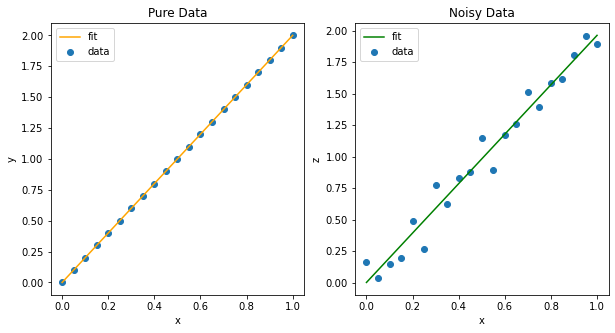

In [5]:
# Put your code here
 
#create a linear function    
    
def line_function(x, A, B):
    return (A*x)+B


#PURE DATA 

#use curve fit function
popt, pcov = curve_fit(line_function, x, y)


#Find the expected values
A_expected = popt[0]  
B_expected = popt[1]

#create a fitted line using predicted function
y_expected1 = line_function(x, A_expected, B_expected)

#NOISY DATA

#use curve fit function using z data
popt, pcov = curve_fit(line_function, x, z)


#Find expected values 
A_expected2 = popt[0]  
B_expected2 = popt[1]


#create a fitted line using predicted function
z_expected = line_function(x, A_expected2, B_expected2)


#Plot Data 
plt.subplots(2,1,figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x, y, label = "data")
plt.plot(x, y_expected1, color = "orange", label = "fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Pure Data")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x, z, label = "data")
plt.plot(x, z_expected, color = "green", label = "fit")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Noisy Data")
plt.legend()

## 3. Exploring Linear Model Fits

### &#9989;&nbsp; Question 3.1: (4 points)

Please **print out** all the fitted model parameters for the pure data set in Question 2, and **answer** the following questions.
- For pure data, what are the expected fitted parameters? Please explain the reason.
- Do you get the exact parameters?

In [27]:
# Put your code here
print("The fitted model parameters for A is", A_expected)
print("The fitted model parameters for B is", B_expected)

The fitted model parameters for A is 2.0000000004751963
The fitted model parameters for B is 7.08738688593091e-22


<font size=+3>&#9998;</font> 
- The exact parameters for the data are 2 and 0.
- I got extremely close to the correct parameters. The A expected was 0.0000000004 greater than the exact. The B expected was basically 0.

### &#9989;&nbsp; Question 3.2: (5 points)

Please **print out** all the fitted model parameters for the noisy data set in Question 2, and **answer** the following questions.
- For noisy data, what are the expected fitted parameters? Please explain the reason.
- Do you get the exact parameters?
- Are this result close to the answer in Questions 3.1?

In [28]:
print("The fitted model parameters for A is", A_expected2)
print("The fitted model parameters for B is", B_expected2)

The fitted model parameters for A is 1.9605329433528382
The fitted model parameters for B is 0.0017910920359444082


<font size=+3>&#9998;</font> 
- The expected parameters are 1.96 and 0.00179. This is because the standard deviation for the noise is 0.1 and since we are multiplying the x values by 2, the overall data will deviate by 0.4, hence 1.96.
- I got very close to the exact parameters. The fitted model parameters were slightly larger than the exact parameters of 1.96 and 0.
- If you consider 0.04 to be close, then yes I would say they are relatively close to question 3.1

### &#9989;&nbsp; Question 3.3: (5 points)

Now, fit linear functions to the noisy data again just like Questions 1 and 2, but this time, we will use different noise options in `np.random.normal` for our noisy data, i.e., Gaussian noise with mean zero and standard deviation 0.01. Please **plot** your predicted functions with the new noisy data, **print out** the fitted model parameters, and **answer** the following questions.
- Comparing to the results you got in Question 2, what kind of change to the noisy data can you observe?
- Comparing to the results you got in Question 2, what kind of change to the fitted function can you observe?
- Comparing to the results you got in Question 3.2, what kind of change to the fitted model parameters can you observe?

The fitted model parameters for A is 1.9960532974722964
The fitted model parameters for B is 0.00017910891134897966


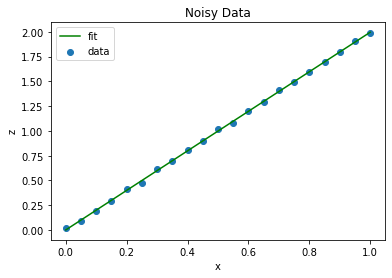

In [29]:
#restate x and y values 
x= np.linspace(0,1,21)
y = 2*x

np.random.seed(seed = 1)

#regenerate normal data using std=0.01
noise = np.random.normal(0, 0.01, x.size)
z = y + noise

#use the curve fit function
popt, pcov = curve_fit(line_function, x, z)


#Find the expected values
A_expected3 = popt[0]  
B_expected3 = popt[1]

#create the best fit line
z_expected2 = line_function(x, A_expected3, B_expected3)


#plot the data
plt.scatter(x, z, label = "data")
plt.plot(x, z_expected2, color = "green", label = "fit")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Noisy Data")
plt.legend()

print("The fitted model parameters for A is", A_expected3)
print("The fitted model parameters for B is", B_expected3)

<font size=+3>&#9998;</font> *Put your answers here.*
- Compared to question 2, the noisy data is much closer to the pure data. This is due to the standard deviation being smaller.
- Overall, the fitted function is also much closer to the pure data fitted function found in Question 2.
- The parameters found for A and B using the 0.01 std are much closer to the exact parameters of 2 and 0 from the pure data. They are also much closer than the noisy data with a std of 0.1. Therefore a smaller standard deviation leads to a closer model of the pure data.

### &#9989;&nbsp; Question 3.4: (5 points)

Fit linear functions to the noisy data again and take Gaussian noise with mean 2 and standard deviation 0.1. Please **plot** your predicted functions with the new noisy data, **print out** the fitted model parameters, and **answer** the following questions.
- Comparing to the results you got in Question 2, what kind of change to the noisy data can you observe?
- Comparing to the results you got in Question 2, what kind of change to the fitted function can you observe?
- Comparing to the results you got in Question 3.2, what kind of change to the fitted model parameters can you observe?

The fitted model parameters for A is 1.9605329433528373
The fitted model parameters for B is 2.0017910920403077


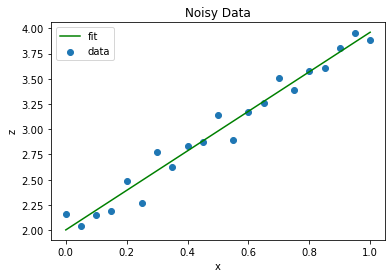

In [30]:
# Put your code here

y = 2*x


np.random.seed(seed = 1)
#generate new noisy data using a mean of 2
noise = np.random.normal(2, 0.1, x.size)
z = y + noise

#use the curve fit function
popt, pcov = curve_fit(line_function, x, z)

#Find the expected values 
A_expected4 = popt[0]  
B_expected4 = popt[1]

#find the predicted line
z_expected3 = line_function(x, A_expected4, B_expected4)


#plot the data
plt.scatter(x, z, label = "data")
plt.plot(x, z_expected3, color = "green", label = "fit")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Noisy Data")
plt.legend()

print("The fitted model parameters for A is", A_expected4)
print("The fitted model parameters for B is", B_expected4)

<font size=+3>&#9998;</font> *Put your answers here.*
- The noisy data on the x-axis stays the same. However, because the mean has doubled, the z have a range from 2 to 4.
- Again, the fitted function now accounts for outputs from 2 to 4 rather then 0 to 2, but looks very similar to the orginal in question 2. 
- The A Expected value did not change from question 2, but the B expected value became 2 instead of zero. This is double what the B expected value was for question 3.2.

## 4. Fitting Quartic (4th-Order Polynomial) Functions


### &#9989;&nbsp; Question 4.1: (1 points)

To improve the fitting, one idea is to add more parameters in the model, so that the model can be more flexible. For example, we can take polynomials with higher orders, say quardratic (2nd order) polynomials, cubic (3rd order) polynomials, quartic (4th order) polynomials, ... rather than linear (1st order) polynomials.

Let's try quartic (4th order) polynomials in this question. Here are some examples of quartic polynomials
$$
y(x) = 2x^4 - 3, \\
y(x) = 0.5x^4 + 1.75x^3 + 3x^2 - x + 7.
$$

Please **answer** the following question.
- How many (fit) parameters are there in a general quartic (4th order) polynomial?

<font size=+3>&#9998;</font> 
- There are 5 parameters in a general quartic polynomial

### &#9989;&nbsp; Question 4.2: (4 points)

Please fit quartic polynomials to pure data and the original noisy data (takeing Gaussian noise with mean zero and standard deviation 0.1). Please **plot** your new fitting functions based on the plots in Question 2. That is to say, plot two subplots for pure data and noisy data, and plot the linear fittings and the quartic fittings on them.

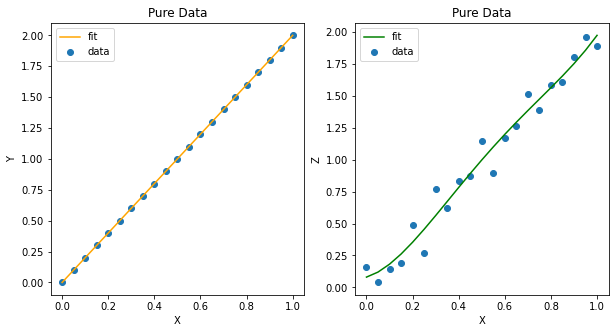

In [31]:
# Put your code here



#restate data
x= np.linspace(0,1,21)
y = 2*x

np.random.seed(seed = 1)

#generate noisy data
noise = np.random.normal(0, 0.1, x.size)
z = y + noise

#define a quartic function with parameter A,B,C,D,F
def quartic_function(x, A, B,C,D,F):
    return A*(x)**4 + B*(x)**3 + C*(x)**2 + (D*x) + F


#PURE DATA 

#use curve fit function
popt, pcov = curve_fit(quartic_function, x, y)



#Find the expected values
A_expected5 = popt[0]  
B_expected5 = popt[1]
C_expected5 = popt[2]  
D_expected5 = popt[3]
F_expected5 = popt[4]  


#Fit a line for y_expected
y_expected2 = quartic_function(x, A_expected5, B_expected5, C_expected5, D_expected5, F_expected5)

#NOISY DATA 

popt, pcov = curve_fit(quartic_function, x, z)


A_expected6 = popt[0]  
B_expected6 = popt[1]
C_expected6 = popt[2]  
D_expected6 = popt[3]
F_expected6 = popt[4]

z_expected4 = quartic_function(x, A_expected6, B_expected6, C_expected6, D_expected6, F_expected6)

#Plot the data
plt.subplots(2,1,figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x, y, label = "data")
plt.plot(x, y_expected2, color = "orange", label = "fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Pure Data")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x, z, label = "data")
plt.plot(x, z_expected4, color = "green", label = "fit")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Pure Data")
plt.legend()


## 5. Exploring Quartic Model Fits

### &#9989;&nbsp; Question 5.1: (5 points)

Please **print out** new fitted model parameters for the both data sets in Question 4, and **answer** the following questions:
- For pure data, what are the expected fitted parameters for the quartic polynomial? Please explain the reason. 
- Do you get the exact parameters?
- For quartic fitting to the noisy data, is that optimized parameter close to the one from the pure data?

In [32]:
print ("The fitted model parameters for pure data are", A_expected5, B_expected5, C_expected5, D_expected5, F_expected5)
print ("The fitted model parameters for noisy data are",A_expected6, B_expected6, C_expected6, D_expected6, F_expected6)

The fitted model parameters for pure data are 4.412657791171811e-07 -8.826852431065188e-07 5.645011920948117e-07 1.9999998752290347 5.520098249663786e-09
The fitted model parameters for noisy data are 3.443902391986949 -7.664932018987657 5.588026248281877 0.5270919456746522 0.08060228528375303


<font size=+3>&#9998;</font>
- Because our function is just representing 2x, we would expect almost all parameters to be zero for the pure data. D would be the only parameter which the value would not be zero. This is becuase the data fits so close to 2x that the rest of the terms are not needed. Here we would expect the D value to be 2 as the function 2x would be in this place and the rest would be zero. 

- We got relatively close to these parameters that were expected for a this function for the pure data, not the noisy data.
- I would say the optimized parameter for noisy data is not very close to the pure data as the pure data has 1.99 and the noisy data has 0.52. These are not close as all. This is becuase the noisy data is allowed room to be distributed among the other parts of the polynomial. Therefore it resulted in larger values for the first and third terms.

### &#9989;&nbsp; Question 5.2: (4 points)

Let's focus on the noisy data and its linear and quartic fittings you have found in Question 4. Please **plot** both fitted functions on a larger domain $-1 \leq x \leq 2$, and **answer** the following question:
- On the larger domain $-1 \leq x \leq 2$, do you think the quartic fitting is close to a linear function or not?
- Based on your fitted parameters and the expression of the quartic polynomial, which terms in the polynomial play a key role in the prediction at $x = 2$?
- In predicting values outside the range of data, which model is more sensitive to the noise, linear one or quartic one?

[ 3.44390239 -7.66493202  5.58802625  0.52709195  0.08060229]


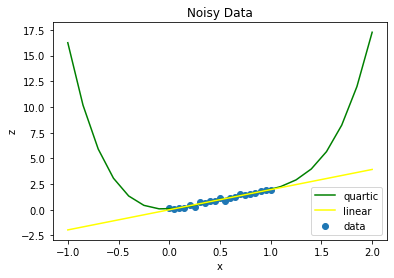

In [26]:
# Put your code here

x= np.linspace(0,1,21)
y = 2*x

np.random.seed(seed = 1)

noise = np.random.normal(0, 0.1, x.size)
z = y + noise

def quartic_function(x, A, B,C,D,F):
    return A*(x)**4 + B*(x)**3 + C*(x)**2 + (D*x) + F

popt, pcov = curve_fit(quartic_function, x, z)
print(popt)

A_expected7 = popt[0]  
B_expected7 = popt[1]
C_expected7 = popt[2]  
D_expected7 = popt[3]
F_expected7 = popt[4]

interval=np.linspace(-1,2,21)
z_expected5 = quartic_function(interval, A_expected7, B_expected7, C_expected7, D_expected7, F_expected7)
z_expected10 = line_function(interval, A_expected2, B_expected2)

plt.scatter(x, z, label = "data")
plt.plot(interval, z_expected5, color = "green", label = "quartic")
plt.plot(interval, z_expected10, color = "yellow", label = "linear")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Noisy Data")
plt.legend()


<font size=+3>&#9998;</font> *Put your answers here.*
- I would say the quartic fitting is much closer to a linear function as seen on the plot up until we are outside the range of data. Then, it appears to dramatically increase, which does not model the linear model.
- The D Term plays the largest role in predicting x=2. 
- I would say the quartic function is much more sensitive to noise because it increases faster.

## 6. (Quantitatively) Evaluating the Model Fits


### &#9989;&nbsp; Question 6: (6 points)

A simple approach that evaluates the quality of the fitting is to measure the mean squared error (MSE). That is, given the data $\{ (a_i, b_i) \} _{i = 1} ^N$, and the fitted model $f$, we shall calculate the  mean squared error
$$ MSE := \frac{1}{N}\sum_{i=1}^{N} (f(a_i) - b_i) ^2.$$

First, please **write** function *MSE*, which has two inputs and one output:
- Input 1: the $y$ data $f(a)$ as a *numpy.ndarray*,
- Input 2: the model fit $y$-value $b$ as a *numpy.ndarray* (with the same size as Input 1),
- Output: the mean squared error $MSE$ as a *float*.

Then, **calculate** the MSE with respect to the data and fitted models we have done in Question 4:
1. pure data, with linear fit,
1. pure data, with quartic fit,
1. noisy data, with linear fit,
1. noisy data, with quartic fit.

Finally, **answer** the following question:
- When considering the noisy data, which fit model has less MSE? Please explain the reason.

In [33]:
# Put your code here
def mse(k, k_expected):
    return (sum((k-k_expected)**2))/len(k)

pure_data_linear=mse(y,y_expected1)
print("The MSE for pure data in the linear function is", pure_data_linear)

pure_data_quartic=mse(y,y_expected2)
print("The MSE for pure data in the quartic function is", pure_data_quartic)

noisy_data_linear=mse(z,z_expected)
print("The MSE for noisy data in the linear function is", noisy_data_linear)

noisy_data_quartic=mse(z,z_expected4)
print("The MSE for noisy data in the quartic function is", noisy_data_quartic)

The MSE for pure data in the linear function is 7.715227542137875e-20
The MSE for pure data in the quartic function is 7.18258655440839e-18
The MSE for noisy data in the linear function is 0.011801249264574072
The MSE for noisy data in the quartic function is 0.0111246790461126


<font size=+3>&#9998;</font> *Put your answer here.*
- They quartic function has less MSE. This is becuase we have given the room for the data to be distributed among parameters. Therefore, the

## 7. Reflecting on Model Fitting

### &#9989;&nbsp; Question 7: (2 points)

The previous questions are based on artificial data, but for real-world data, the we will have the same question about how to choose the fitted model. Please **answer** the following questions:
- Is it true the models with more parameters (or with larger function space) is better?
- For real-world data, what kind of fitting models shall we choose?

<font size=+3>&#9998;</font> *Put your answers here.*
- Yes, the more parameters that are in your function will produce a better, more accurrate model. This is becuase you are providing more information for the prediction.
- We will have to generalize this statement as it is a case-by-case scenario. In real-world data, we should choose the model that will include the most amount of parameters within a realistic setting that can contribute to the overall accuracy of the model. 

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  
Go to the "Homework Assignments" section, find the appropriate submission folder link, and upload it there.


&#169; Copyright 2022, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.